In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt

## Loading the Data

In [51]:
df = pd.read_csv(r"/content/mth_695.csv",engine='python', encoding='cp1252')

## Preprocessing

In [52]:
def shape_data(data: pd.DataFrame)->pd.DataFrame:
  print(f"Rows:{data.shape[0]}")
  print(f"Cols:{data.shape[1]}")

In [53]:
shape_data(df)

Rows:750666
Cols:11


In [54]:
df.sample(6)

,Timestamp,Loot_Type,Augmenter_Name,Galaxy_Name,Quantity,Victim_Name,Victim_Husk,Attacker_Name,Attacker_Type,Attacker_SOB,Drop_Chance
226142,2023-11-26T18:36:52,spawn,Minor Thrust Augmenter,Deep Jungle,1,Ishmael,Monkey,MistOfSteel,Persona,SOB_SPACESHIP,0.113193
133750,2023-11-13T15:44:55,spawn,Exc. Docking Augmenter,Snake Visions,1,Dunaldemerf,Icepick,WB932 (Castlevania),Bot,SOB_SPACESHIP,0.046000
409383,2023-12-22T08:58:51,treasure,Sniper Mastery Augmenter,Kidd's Hideaway,1,Captain Kidd,Kidd's Prawn,Crade,Persona,SOB_SPACESHIP,0.000000
179619,2023-11-20T17:35:34,treasure,Good Fading Augmenter,DG Garos 0.1139A,1,metrosketchual,Jelly Mothership,Cojines,Persona,SOB_SPACESHIP,0.000000
68285,2023-11-05T08:02:17,treasure,Std. Targeting Augmenter,DG Vexation 0.113,1,Iniquitous Forgotten,Forgone,Citala,Persona,SOB_PILLBOX,0.000000
745347,2024-02-03T04:59:17,spawn,Minor Thrust Augmenter,Ngorongoro,1,Genuine Risk,Zebra,CB104 (ummmmmmmmm),Bot,SOB_SPACESHIP,0.112000


### Data Profiling

In [55]:
# Data Profiling
def create_data_profiling_df(data: pd.DataFrame) -> pd.DataFrame:

    # create an empty dataframe to gather information about each column
    data_profiling_df = pd.DataFrame(columns = ["column_name",
                                                "column_type",
                                                "unique_values",
                                                "duplicate_values",
                                                "null_values",
                                                "max",
                                                "min",
                                                "range",
                                                "IQR"])

    # loop through each column to add rows to the data_profiling_df dataframe
    for column in data.columns:

        column_dict = {}

        try:
            column_dict["column_name"] = [column]
            column_dict["column_type"] = [data[column].dtypes]
            column_dict["unique_values"] = [len(data[column].unique())]
            column_dict["duplicate_values"] = [(data[column].shape[0] - data[column].isna().sum()) - len(data[column].unique())]
            column_dict["null_values"] = [data[column].isna().sum()]
            column_dict["max"] = [data[column].max() if (data[column].dtypes != object) else "NA"]
            column_dict["min"] = [data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["range"] = [data[column].max() - data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["IQR"] = [round(data[column].quantile(.75) - data[column].quantile(.25), 2) if (data[column].dtypes != object) else "NA"]
            column_dict["standard_dev"] = [round(data[column].std(), 2) if (data[column].dtypes != object) else "NA"]

        except:
            print(f"unable to read column: {column}, you may want to drop this column")

        data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame(column_dict)],
                                      ignore_index = True)

    data_profiling_df.sort_values(by = ['unique_values'],
                                  ascending = [False],
                                  inplace=True)

    print("data profiling complete.")
    return data_profiling_df

In [56]:
prof = create_data_profiling_df(df)
prof

data profiling complete.


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR,standard_dev
0,Timestamp,object,553112,197554,0,NA,NA,NA,NA,NA
10,Drop_Chance,float64,147090,603576,0,132.428,0.0,132.428,0.07,0.36
5,Victim_Name,object,33242,717424,0,NA,NA,NA,NA,NA
7,Attacker_Name,object,22392,728274,0,NA,NA,NA,NA,NA
3,Galaxy_Name,object,12561,738105,0,NA,NA,NA,NA,NA
6,Victim_Husk,object,634,750032,0,NA,NA,NA,NA,NA
2,Augmenter_Name,object,592,750074,0,NA,NA,NA,NA,NA
9,Attacker_SOB,object,4,749806,856,NA,NA,NA,NA,NA
1,Loot_Type,object,3,750663,0,NA,NA,NA,NA,NA
4,Quantity,int64,3,750663,0,3,1,2,0.0,0.02


### Checking Type of Data

In [57]:
df.Loot_Type.value_counts()

spawn       521039
treasure    202768
drop         26859
Name: Loot_Type, dtype: int64

In [58]:
df.Quantity.value_counts()

1    750463
2       200
3         3
Name: Quantity, dtype: int64

In [59]:
df.Attacker_Type.value_counts()

Persona    449087
Bot        301579
Name: Attacker_Type, dtype: int64

In [60]:
df.Attacker_SOB.value_counts()

SOB_SPACESHIP    618074
SOB_PILLBOX      127338
SOB_USERBASE       4398
Name: Attacker_SOB, dtype: int64

## Create a new DataFrame

Attackers and number of attacks registered in each galaxy

In [ ]:
# Number of different attackers registered
len(df['Attacker_Name'].unique())

NameError: name 'df' is not defined

In [ ]:
# Take players we registered at least 10 attacks from
attacker = list(df['Attacker_Name'].value_counts()[df['Attacker_Name'].value_counts()>10].index)

# List of Unique Galaxies
galaxies = list(df['Galaxy_Name'].unique())

NameError: name 'df' is not defined

In [ ]:
# Number of Attackers that registered more than 10 attacks
len(attacker)

NameError: name 'attacker' is not defined

In [ ]:
len(galaxies)

NameError: name 'galaxies' is not defined

In [ ]:
# Create dataframe to store players and attacks in every galaxy

# Set up the columns of the dataframe
columns_df = ['Attacker_Name']
columns_df = columns_df + galaxies
df1 = pd.DataFrame()

# Dictionary used to store rows to append to the dataframe
entry = {x:0 for x in columns_df}

# List that stores the rows to be added to the dataframe
rows = []

# Loop over every player
for player in tqdm(attacker):

  entry_actual = entry.copy()
  entry_actual['Attacker_Name'] = player
  att_galaxies = df[df['Attacker_Name']==player]['Galaxy_Name']

  # Loop over every Galaxy where we recorded activity for current player
  for in_galaxy in att_galaxies.unique():

    # Count number of appearances current player has in that galaxy
    entry_actual[in_galaxy] =  (att_galaxies==in_galaxy).sum()

  # Include the current players info in the row list
  rows.append(entry_actual)

# Include rows to dataframe
df1 = pd.DataFrame.from_dict(rows, orient='columns')


NameError: name 'galaxies' is not defined

In [ ]:
# Final DataFrame
df1

NameError: name 'df1' is not defined

In [ ]:
# Export the DataFrame as a CSV
from google.colab import files

df1.to_csv('players_galaxies.csv')
files.download('players_galaxies.csv')

NameError: name 'df1' is not defined

In [ ]:
df1.set_index('Attacker_Name', drop=True, inplace=True)


NameError: name 'df1' is not defined

### Analysis on new DataFrame

In [ ]:
nattacks_galaxy = (df1.sum()).to_frame()
nattacks_galaxy.columns = ['total_attacks']

NameError: name 'df1' is not defined

In [ ]:
nattacks_galaxy['player_attacks'] = np.count_nonzero(df1, axis=0)

NameError: name 'df1' is not defined

In [ ]:
nattacks_galaxy

NameError: name 'nattacks_galaxy' is not defined

In [ ]:
nattacks_galaxy.total_attacks.nlargest(10).reset_index()

NameError: name 'nattacks_galaxy' is not defined

In [ ]:
nattacks_galaxy.player_attacks.nlargest(10).reset_index()

NameError: name 'nattacks_galaxy' is not defined

In [ ]:
df1

NameError: name 'df1' is not defined

In [ ]:
nattacks_galaxy['index1'] = nattacks_galaxy.index

NameError: name 'nattacks_galaxy' is not defined

In [ ]:
sns.barplot(x = 'index1',
            y = 'total_attacks',
            data = nattacks_galaxy)

NameError: name 'nattacks_galaxy' is not defined

In [ ]:
sns.histplot(data=nattacks_galaxy, x="total_attacks")

NameError: name 'nattacks_galaxy' is not defined

## Classifying Players

**Getting the number of sessions played.**

In [65]:
# Function to apply in a dataframe to give a 1 everytime the difference in time is greater than 1.5 hours
def get_sessions(diff):
  if diff> datetime.timedelta(hours = 1.5):
    return 1
  else:
    return 0

In [66]:
# Make the Timestamp object a datetime object
df['datetime'] = pd.to_datetime(df['Timestamp'])

In [67]:
# Make a copy of orginal data set to work with
df2 = df.copy()

In [68]:
# Calculate difference in times between players recorded activity
df2['diff'] = df2.groupby('Attacker_Name')['datetime'].diff()

In [69]:
# Gives a 1 everytime time difference in activities is greater than 1.5 hours.
# Considers this a new session
df2['sessions'] = df2['diff'].apply(get_sessions)

In [70]:
# Sums over the sessions columns group by player's names
y = (df2.groupby('Attacker_Name').sum()['sessions'] +1 ).to_frame()
y

<ipython-input-70-24d933cefc26>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = (df2.groupby('Attacker_Name').sum()['sessions'] +1 ).to_frame()


,sessions
Attacker_Name,
phil,35
( I ),4
*** Kennedy ***,1
**** Kennedy ****,1
*Quimbaya*,6
...,...
zek,53
zelenduo,6
zelenion,10


In [71]:
# Create Dataframe that records the number of activities recorded by each player
r = df2.groupby('Attacker_Name').count()['Timestamp'].to_frame().rename(columns = {'Timestamp':'activity_recorded'})
r

,activity_recorded
Attacker_Name,
phil,1894
( I ),17
*** Kennedy ***,2
**** Kennedy ****,17
*Quimbaya*,6
...,...
zek,1075
zelenduo,69
zelenion,65


In [72]:
# Merge the sessions and activity
merged_df = pd.merge(y, r, left_index=True, right_index=True)

In [73]:
# Add a column which takes the ratio of number of activity entries from each player and the number of session played (actions per session).
merged_df['activity_per_session'] = merged_df['activity_recorded']/merged_df['sessions']

In [74]:
# Sort values in descending order
merged_df.sort_values('activity_per_session', ascending = False)

,sessions,activity_recorded,activity_per_session
Attacker_Name,,,
Qu'Kuu,1,286,286.0
Sigemas2,1,232,232.0
WB24 (nickel),1,196,196.0
CB177 (The Eventhorizon),2,360,180.0
CB833 (Fire),1,170,170.0
...,...,...,...
CB269 (black out),3,3,1.0
CB880 (ada153),1,1,1.0
CB27 (Corrupted Seeker),1,1,1.0


In [75]:
# Sort values in descending order
merged_df.sort_values('sessions', ascending = False)

,sessions,activity_recorded,activity_per_session
Attacker_Name,,,
Cojines,271,27654,102.044280
Teeth35,241,687,2.850622
Medius,224,279,1.245536
Doman,215,5032,23.404651
Hollow,203,10171,50.103448
...,...,...,...
CB638 (Undead kightkiller),1,4,4.000000
CB638 (larjulan),1,1,1.000000
CB639 (Barrett50),1,1,1.000000


**Histogram players with sessions over 25.**

<Axes: xlabel='sessions', ylabel='Count'>

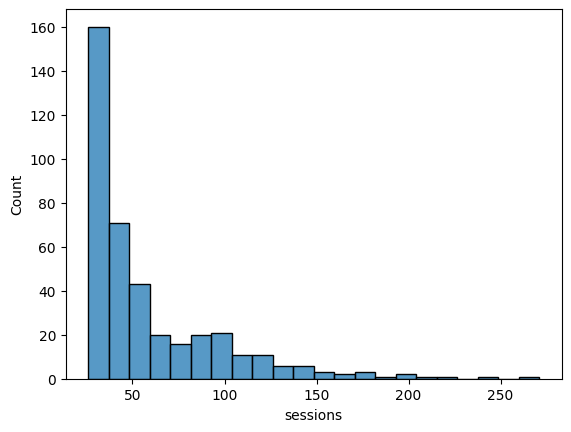

In [76]:
sns.histplot(data=merged_df[merged_df['sessions']>25], x='sessions')

**Histogram players with sessions under 5.**

<Axes: xlabel='sessions', ylabel='Count'>

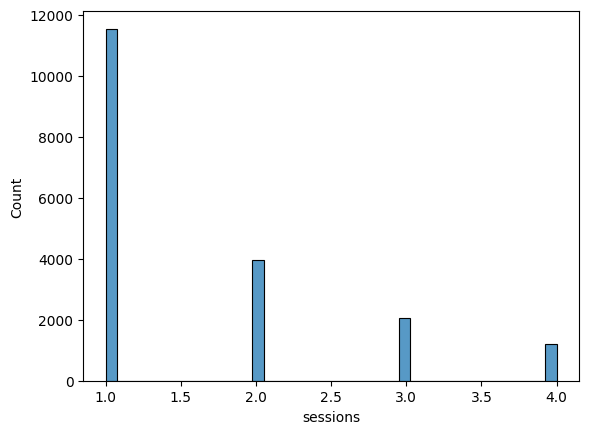

In [77]:
sns.histplot(data=merged_df[merged_df['sessions']<5], x='sessions')

**Scatter plot number of activities vs sessions colored by the activity-sessions ratio.**

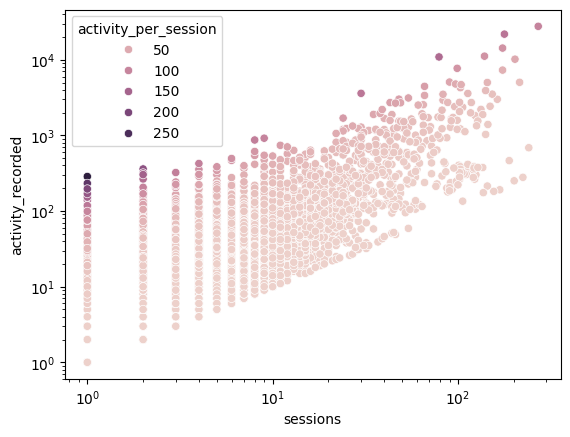

In [78]:
sns.scatterplot(data=merged_df,x='sessions', y='activity_recorded', hue='activity_per_session')
plt.yscale('log')
plt.xscale('log')

**Scatter plot number of activity-sessions ratio vs sessions colored by activity recorded.**

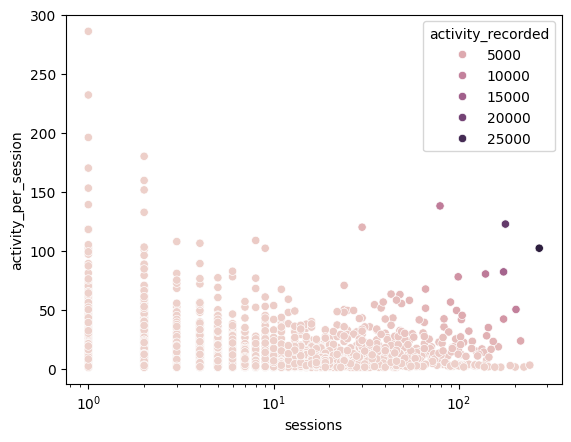

In [79]:
sns.scatterplot(data=merged_df,x='sessions', y='activity_per_session', hue='activity_recorded')
#plt.yscale('log')
plt.xscale('log')

**Scatter plot with players with more than 15 sessions and less than 25 activity recorded.**

In [80]:
# Export the DataFrame as a CSV
from google.colab import files

merged_df.to_csv('player_sessions.csv')
files.download('player_sessions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>